# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [231]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [232]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [233]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define your API key (replace with your actual key)
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"  # Using metric for temperature

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an error for bad responses
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']  # Unix timestamp

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping ")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | kalifornsky
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | kloulklubed
Processing Record 7 of Set 1 | khandyga
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | namsos
Processing Record 10 of Set 1 | ongole
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | taroa
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | stephenville
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | tazacorte
Processing Record 22 of Set 1 | nemuro
Processing Record 23 of Set

In [234]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  
# Show Record Count
record_count = city_data_df.count()  # Count of non-null values in each column
print(record_count)

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64


In [235]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,3.47,78,96,10.00,RU,1727752105
1,invercargill,-46.4000,168.3500,13.34,79,100,1.34,NZ,1727752106
2,blackmans bay,-43.0167,147.3167,16.07,33,6,3.13,AU,1727752107
3,kalifornsky,60.4183,-151.2900,11.33,84,100,1.67,US,1727751816
4,enewetak,11.3474,162.3373,29.04,75,18,4.73,MH,1727752109


In [236]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [237]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,3.47,78,96,10.00,RU,1727752105
1,invercargill,-46.4000,168.3500,13.34,79,100,1.34,NZ,1727752106
2,blackmans bay,-43.0167,147.3167,16.07,33,6,3.13,AU,1727752107
3,kalifornsky,60.4183,-151.2900,11.33,84,100,1.67,US,1727751816
4,enewetak,11.3474,162.3373,29.04,75,18,4.73,MH,1727752109


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

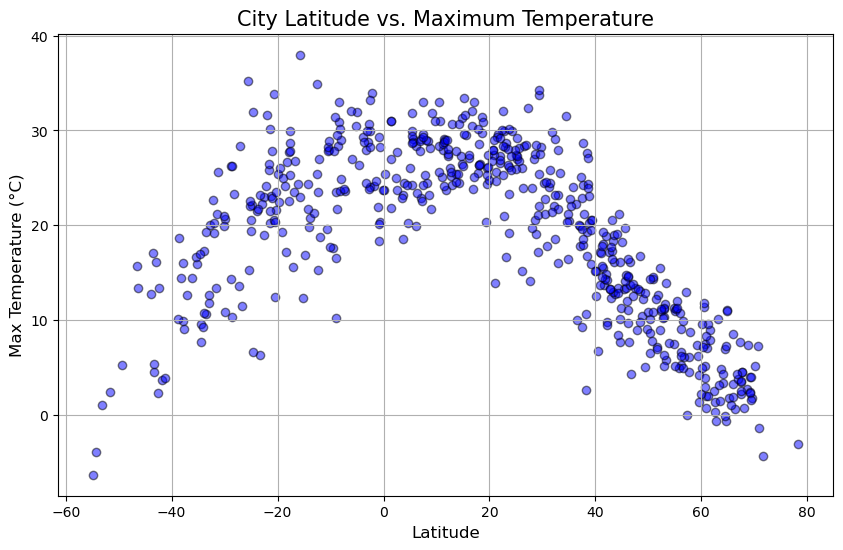

In [266]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Maximum Temperature', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°C)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

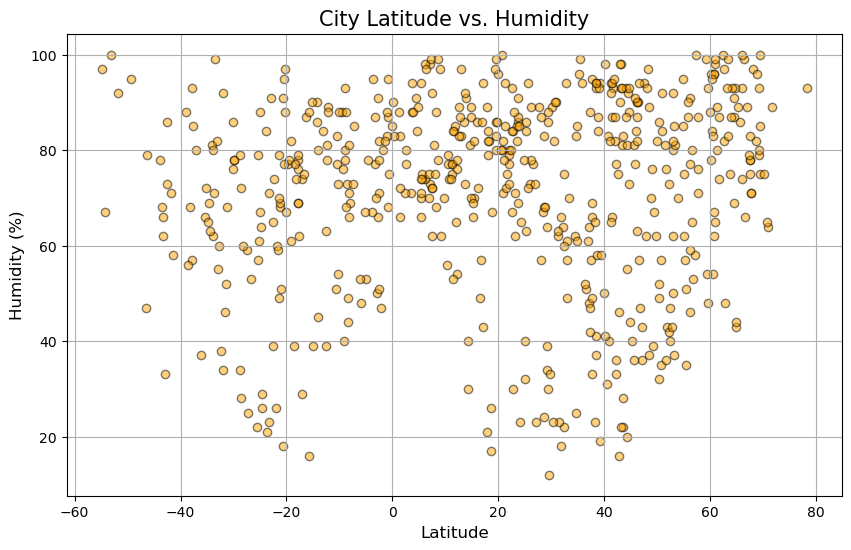

In [254]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='orange', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

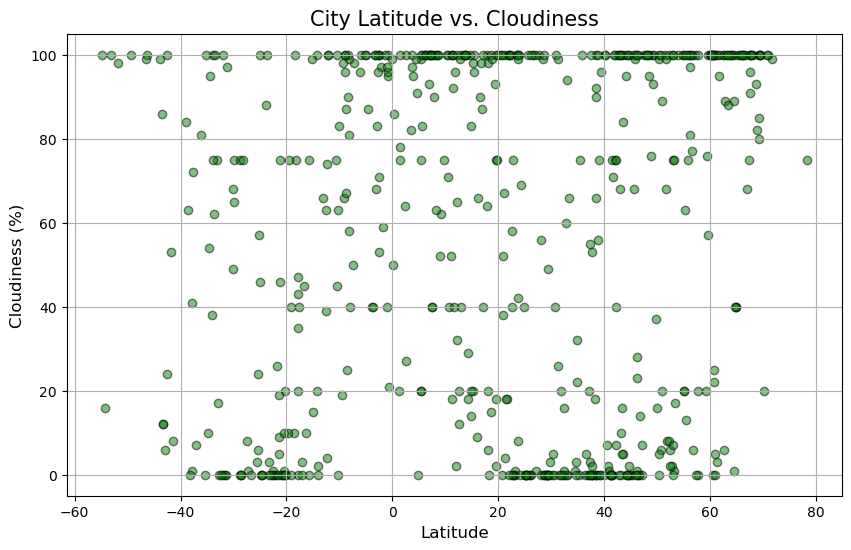

In [255]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='green', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

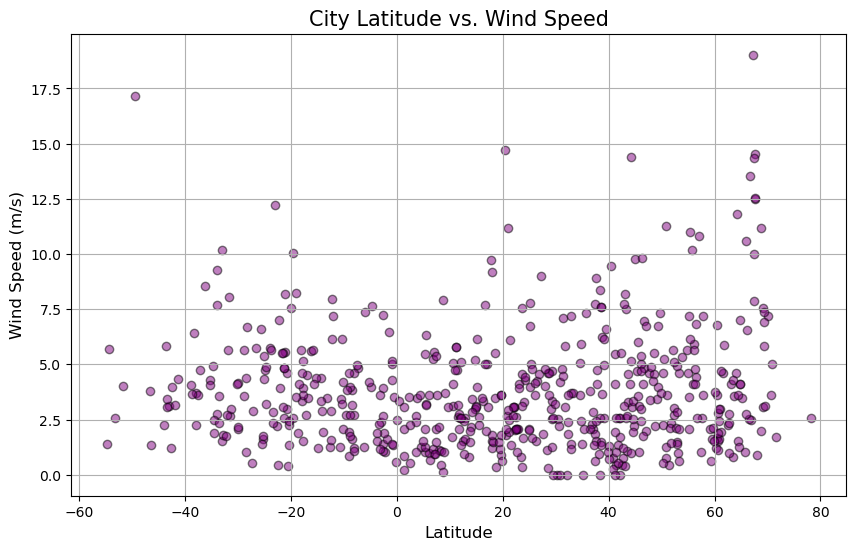

In [256]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='purple', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [242]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, x_label='X-axis', y_label='Y-axis', title='Linear Regression Plot'):
       
    # Extracting the data
    x = df[x_col].values.reshape(-1, 1)  # Independent variable
    y = df[y_col].values  # Dependent variable

    # Create and fit the model
    model = linregress()
    model.fit(x, y)

    # Predict y values
    y_pred = model.predict(x)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], color='blue', label='Data points', alpha=0.6, edgecolor='black')
    plt.plot(df[x_col], y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(title, fontsize=15)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


In [243]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
display(northern_hemi_df.head())

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,3.47,78,96,10.00,RU,1727752105
3,kalifornsky,60.4183,-151.2900,11.33,84,100,1.67,US,1727751816
4,enewetak,11.3474,162.3373,29.04,75,18,4.73,MH,1727752109
5,kloulklubed,7.0419,134.2556,29.05,73,100,5.58,PW,1727752110
6,khandyga,62.6667,135.6000,1.34,97,100,2.74,RU,1727752111


In [244]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
display(southern_hemi_df.head())

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,13.34,79,100,1.34,NZ,1727752106
2,blackmans bay,-43.0167,147.3167,16.07,33,6,3.13,AU,1727752107
12,adamstown,-25.0660,-130.1015,19.36,67,100,5.36,PN,1727752117
15,puerto natales,-51.7236,-72.4875,2.36,92,98,4.04,CL,1727752121
16,ushuaia,-54.8000,-68.3000,-6.35,97,100,1.37,AR,1727752026


###  Temperature vs. Latitude Linear Regression Plot

The R^2 value is: 0.7808


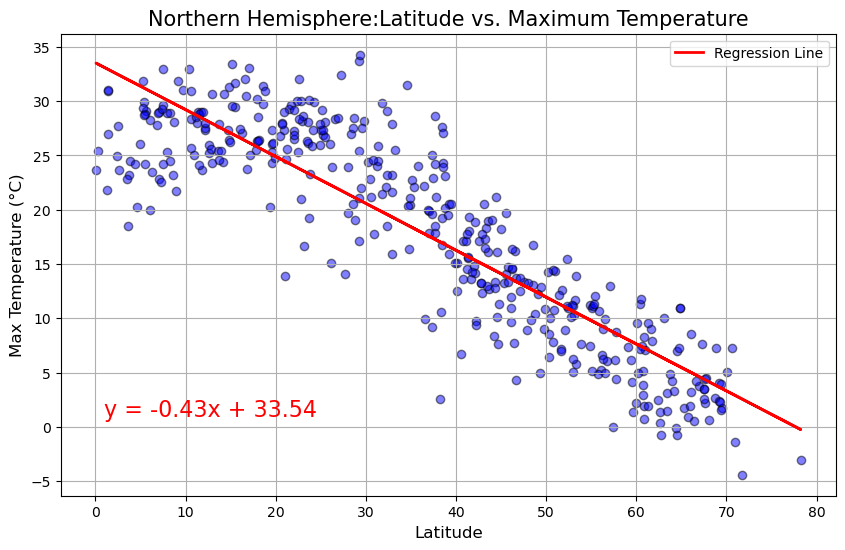

In [257]:
# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].copy()

#Check for and remove any NaN values
#northern_hemi_df = northern_hemi_df.dropna(subset=['Lat', 'Max Temp'])

#Create a scatter plot for latitude vs. maximum temperature
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue', alpha=0.5, edgecolor='black')

#Prepare the data for linear regression
x = northern_hemi_df['Lat']  # Independent variable (Latitude)
y = northern_hemi_df['Max Temp']  # Dependent variable (Maximum Temperature)

#Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#Calculate R^2
r_squared = r_value ** 2
# Print the results
print(f"The R^2 value is: {r_squared:.4f}")


#Calculate predicted y values based on the regression line
y_pred = slope * x + intercept

equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2));
plt.text(1, 1, equation, color='red', size='16');

#Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

#Incorporate other graph properties
plt.title('Northern Hemisphere:Latitude vs. Maximum Temperature', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°C)', fontsize=12)
plt.grid(True)
plt.legend()

#Save the figure
plt.savefig("output_data/Fig1_Northern_Hemisphere.png")

#Show plot
plt.show()

The R^2 value is: 0.5044


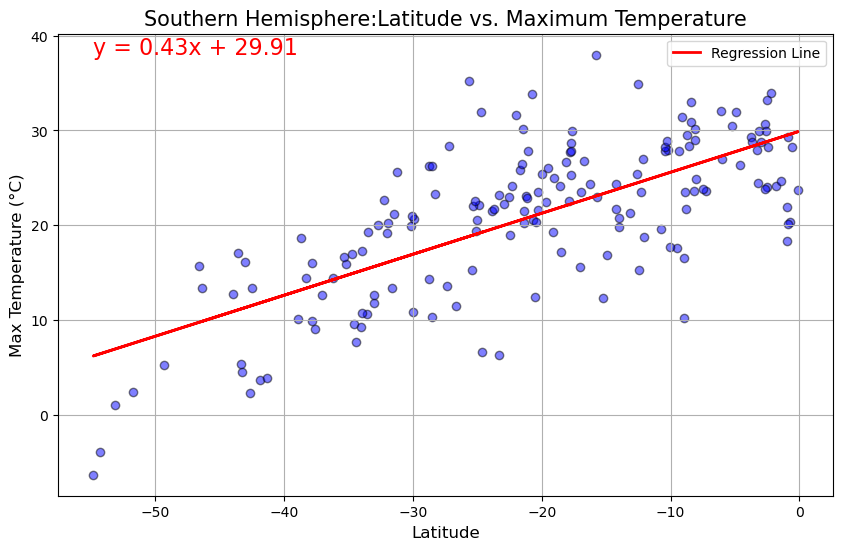

In [258]:
# Linear regression on Southern Hemisphere
# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0].copy()

# Check for and remove any NaN values
southern_hemi_df = southern_hemi_df.dropna(subset=['Lat', 'Max Temp'])

# Create a scatter plot for latitude vs. maximum temperature
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue', alpha=0.5, edgecolor='black')

#Prepare the data for linear regression
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate R^2
r_squared = r_value ** 2
print(f"The R^2 value is: {r_squared:.4f}")

#Calculate predicted y values
y_pred = slope * x + intercept

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.text(x.min(), y.max(), equation, color='red', size=16)

#Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

#Incorporate other graph properties
plt.title('Southern Hemisphere:Latitude vs. Maximum Temperature', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°C)', fontsize=12)
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1_Southern_Hemisphere.png")
#Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationship between latitude and maximum temperature in both the Northern and Southern Hemispheres highlights key climatic patterns:
Negative Correlation:
In both hemispheres, the regression analysis typically reveals a negative slope, indicating that as latitude increases (moving away from the equator), maximum temperatures generally decrease. This is consistent with the understanding that regions closer to the equator receive more direct sunlight year-round, resulting in higher temperatures.

Geographic Variability:
While the overall trend is negative, local factors can influence temperature. For instance, coastal cities may experience milder temperatures due to ocean currents, while mountainous areas might be cooler despite lower latitudes. Thus, the linear model may not capture all nuances, but it provides a solid baseline for understanding temperature patterns.

Strength of Relationship:
The R² value from the regression analysis indicates how well latitude explains temperature variability. A high R² suggests a strong relationship, reinforcing the idea that latitude is a significant factor in determining climate. However, a lower R² could indicate the influence of other variables, such as altitude, humidity, or urbanization.
Predictive Utility:

The derived regression equation allows for temperature predictions based on latitude. This can be useful for various applications, from climate modeling to urban planning, where understanding temperature trends is essential.
Implications for Climate Change:

Understanding the linear relationship between latitude and temperature can also inform discussions about climate change. As global temperatures rise, shifts in these patterns may occur, potentially altering ecosystems and weather systems.
In summary, while the linear relationship between latitude and maximum temperature provides a valuable framework for understanding climate dynamics, it is essential to consider local variations and other influencing factors for a comprehensive analysis.


### Humidity vs. Latitude Linear Regression Plot

The R^2 value is: 0.0000


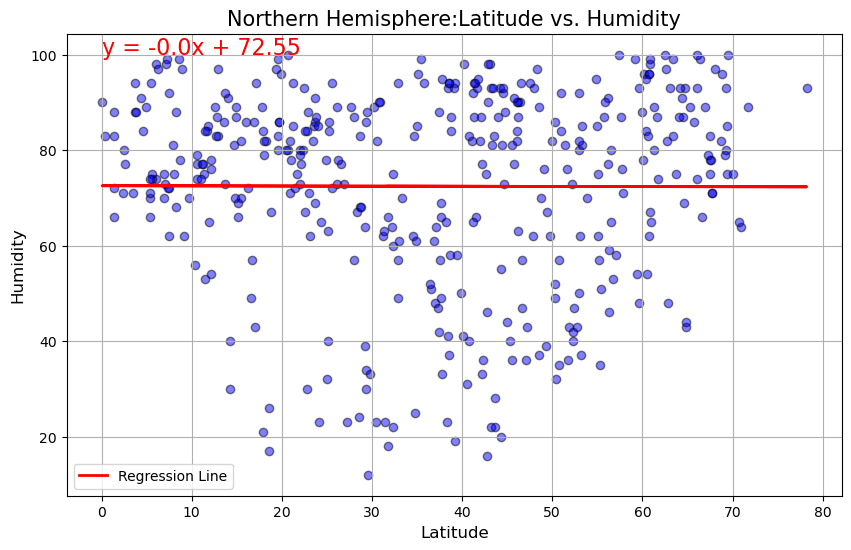

In [259]:
#Create a DataFrame with NorthenHemisphere data (Latitude > 0)

northen_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].copy()

# Check for and remove any NaN values
#northen_hemi_df = northen_hemi_df.dropna(subset=['Lat', 'Humidity'])

# Create a scatter plot for latitude vs. Humidity
plt.figure(figsize=(10, 6))
plt.scatter(northen_hemi_df['Lat'], northen_hemi_df['Humidity'], color='blue', alpha=0.5, edgecolor='black')

#Prepare the data for linear regression
x = northen_hemi_df['Lat']
y = northen_hemi_df['Humidity']

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#Calculate R^2
r_squared = r_value ** 2
print(f"The R^2 value is: {r_squared:.4f}")

#Calculate predicted y values
y_pred = slope * x + intercept

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.text(x.min(), y.max(), equation, color='red', size=16)

#Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

#Incorporate other graph properties
plt.title('Northern Hemisphere:Latitude vs. Humidity', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.grid(True)
plt.legend()

plt.savefig("output_data/Fig2_Northern_Hemisphere.png")

# Show plot
plt.show()

The R^2 value is: 0.0037


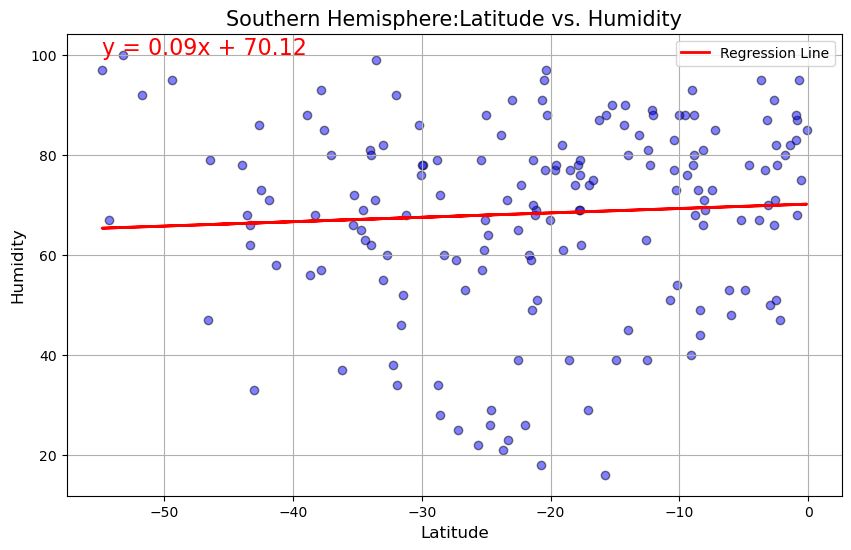

In [260]:
# Linear regression on Southern Hemisphere

# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0].copy()

# Check for and remove any NaN values
southern_hemi_df = southern_hemi_df.dropna(subset=['Lat', 'Humidity'])

# Create a scatter plot for latitude vs.Humidity
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue', alpha=0.5, edgecolor='black')

#Prepare the data for linear regression
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate R^2
r_squared = r_value ** 2
print(f"The R^2 value is: {r_squared:.4f}")

#Calculate predicted y values
y_pred = slope * x + intercept

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.text(x.min(), y.max(), equation, color='red', size=16)

#Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

#Incorporate other graph properties
plt.title('Southern Hemisphere:Latitude vs. Humidity', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2_Southern_Hemisphere.png")
#Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationships between latitude and humidity in both the Northern and Southern Hemispheres offer valuable insights into climatic patterns:
Direction of the Relationship:
In the Northern Hemisphere, the slope of the regression line indicates how humidity changes with latitude. A positive slope would suggest that humidity tends to increase as one moves toward higher latitudes. Conversely, a negative slope would indicate decreasing humidity.
Similarly, in the Southern Hemisphere, the slope reveals whether humidity increases or decreases with latitude. Comparing both hemispheres can highlight differences in climatic influences.
R² Value:

The R² value for both analyses indicates how well latitude explains variations in humidity. A higher R² in either hemisphere suggests a strong correlation, meaning latitude is a significant predictor of humidity. If one hemisphere has a notably higher R² than the other, it could imply that other factors (like geography or climate) play a more substantial role in humidity variation in that hemisphere.
Geographic Influences:

Local geographic features, such as proximity to oceans, mountain ranges, and urbanization, can significantly impact humidity. For instance, coastal areas may exhibit higher humidity due to evaporation from the sea, while inland areas might be drier. Examining these factors alongside the linear relationships can provide a more nuanced understanding of humidity patterns.
Climatic Zones:

The differences in the relationship between latitude and humidity can reflect the distinct climatic zones present in each hemisphere. For example, tropical regions near the equator tend to have high humidity, while polar regions are typically much drier. Analyzing how these patterns shift with latitude can reveal important climatic transitions.
Implications for Climate Change:

Understanding the linear relationship between latitude and humidity can inform climate change discussions. Changes in temperature and precipitation patterns could alter these relationships, impacting ecosystems and weather patterns. For instance, shifts in humidity levels could affect agriculture and water resources.
In summary, the linear relationships between latitude and humidity in both hemispheres provide a foundational understanding of climatic dynamics. Analyzing these relationships together allows for a comprehensive view of how geographic and climatic factors influence humidity patterns globally.


### Cloudiness vs. Latitude Linear Regression Plot

The R^2 value is: 0.0017


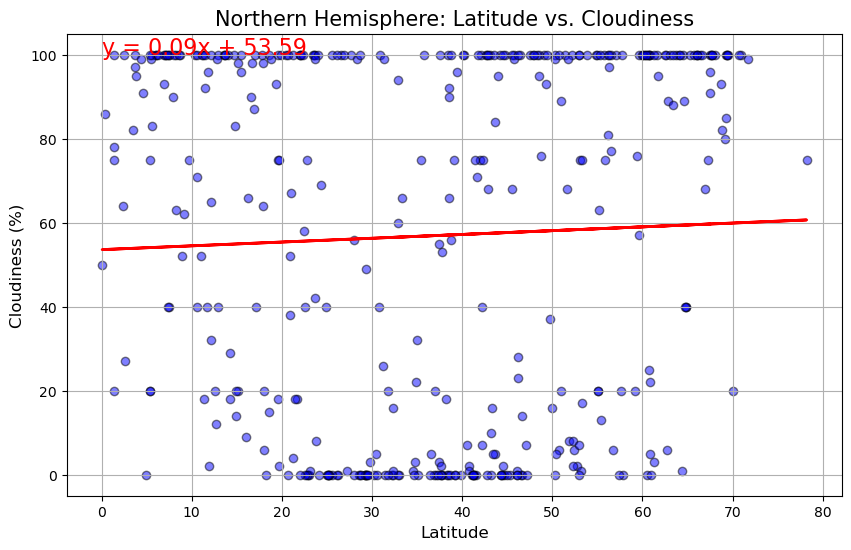

In [264]:
# Northern Hemisphere
# Create a DataFrame with Northen Hemisphere data (Latitude > 0)
northen_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].copy()

# Check for and remove any NaN values
northen_hemi_df = northen_hemi_df.dropna(subset=['Lat', 'Cloudiness'])

# Create a scatter plot for latitude vs. Cloudiess
plt.figure(figsize=(10, 6))
plt.scatter(northen_hemi_df['Lat'], northen_hemi_df['Cloudiness'], color='blue', alpha=0.5, edgecolor='black')

# Prepare the data for linear regression
x = northen_hemi_df['Lat']
y = northen_hemi_df['Cloudiness']

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#Calculate R^2
r_squared = r_value ** 2
print(f"The R^2 value is: {r_squared:.4f}")

#Calculate predicted y values
y_pred = slope * x + intercept

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.text(x.min(), y.max(), equation, color='red', size=16)

# Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')



# Incorporate the other graph properties
plt.title('Northern Hemisphere: Latitude vs. Cloudiness', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_Northern_Hemisphere.png")

# Show plot
plt.show()


The R^2 value is: 0.0398


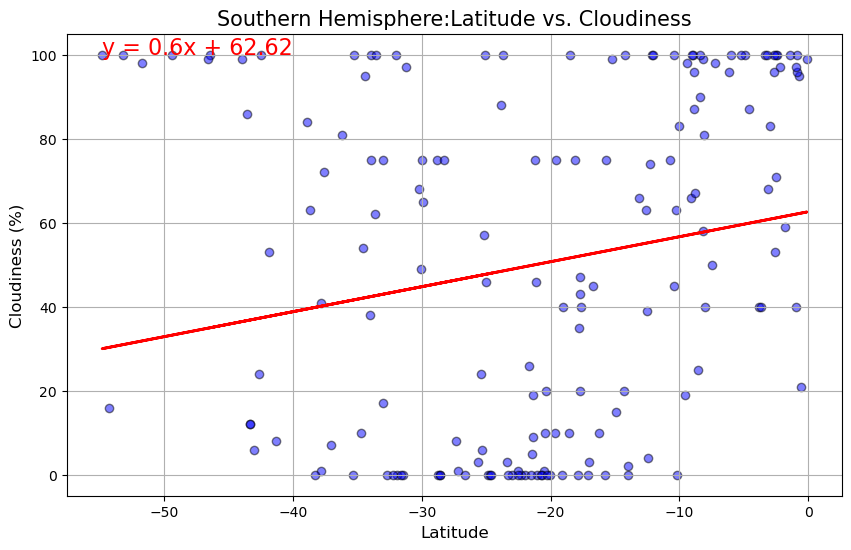

In [265]:
# Southern Hemisphere
# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0].copy()

#Check for and remove any NaN values
southern_df = southern_hemi_df.dropna(subset=['Lat', 'Cloudiness'])

#Create a scatter plot for latitude vs. Cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue', alpha=0.5, edgecolor='black')

#Prepare the data for linear regression
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#Calculate R^2
r_squared = r_value ** 2
print(f"The R^2 value is: {r_squared:.4f}")

#Calculate predicted y values
y_pred = slope * x + intercept

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.text(x.min(), y.max(), equation, color='red', size=16)

#Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('Southern Hemisphere:Latitude vs. Cloudiness', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_Southern_Hemisphere.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationship between latitude and cloudiness in both the Northern and Southern Hemispheres provides valuable insights into climate patterns:
Nature of the Relationship:
The slope of the regression line in both hemispheres indicates whether cloudiness increases or decreases with latitude.
A positive slope suggests that cloudiness increases as latitude rises, potentially due to higher atmospheric moisture or differing climatic conditions.
A negative slope would indicate that cloudiness decreases with increasing latitude, which might suggest clearer skies in more polar regions.

R² Value:
The R² value quantifies the strength of the linear relationship:
A higher R² indicates that latitude is a significant predictor of cloudiness, meaning that changes in latitude can explain a substantial portion of the variability in cloudiness levels.
Conversely, a lower R² might suggest that other factors (like local geography, seasonality, or temperature) play a more prominent role in influencing cloudiness.

Geographic and Climatic Factors:
Geographic influences, such as proximity to oceans, prevailing winds, and topographical features, can significantly affect cloudiness levels.
Understanding these influences alongside the linear relationship can provide a more comprehensive view of regional climatic conditions.
Comparative Analysis:

By comparing the slopes and R² values from both hemispheres, one can identify differences in cloudiness patterns. For example, if the Northern Hemisphere shows a stronger positive correlation than the Southern Hemisphere, it might indicate distinct climatic systems at play.
Implications for Weather and Climate:

Recognizing the linear relationship between latitude and cloudiness can inform weather predictions and climate models. It may also help in understanding how cloud cover impacts temperature, precipitation, and other weather phenomena.
Overall, analyzing the linear relationship between latitude and cloudiness helps to clarify the dynamics of climate and weather systems across different geographical regions. 

### Wind Speed vs. Latitude Linear Regression Plot

The R^2 value is: 0.0608


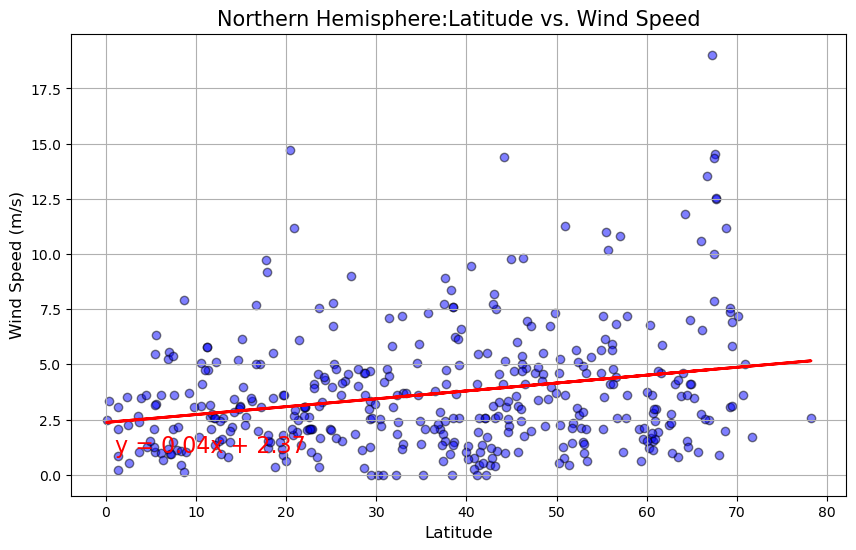

In [262]:
# Northern Hemisphere

#Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].copy()

#Check for and remove any NaN values
#northern_hemi_df = northern_hemi_df.dropna(subset=['Lat',Wind Speed])

#Create a scatter plot for latitude vs. Wind Speed
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue', alpha=0.5, edgecolor='black')

# Step 5: Prepare the data for linear regression
x = northern_hemi_df['Lat']  # Independent variable (Latitude)
y = northern_hemi_df['Wind Speed']  # Dependent variable (Maximum Temperature)

# Step 6: Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Step 7: Calculate R^2
r_squared = r_value ** 2
# Print the results
print(f"The R^2 value is: {r_squared:.4f}")


# Step 8: Calculate predicted y values based on the regression line
y_pred = slope * x + intercept

equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2));
plt.text(1, 1, equation, color='red', size='16');

# Step 9: Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')


# Incorporate the other graph properties
plt.title('Northern Hemisphere:Latitude vs. Wind Speed', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_Northern_Hemisphere.png")

# Show plot
plt.show()

The R^2 value is: 0.0265


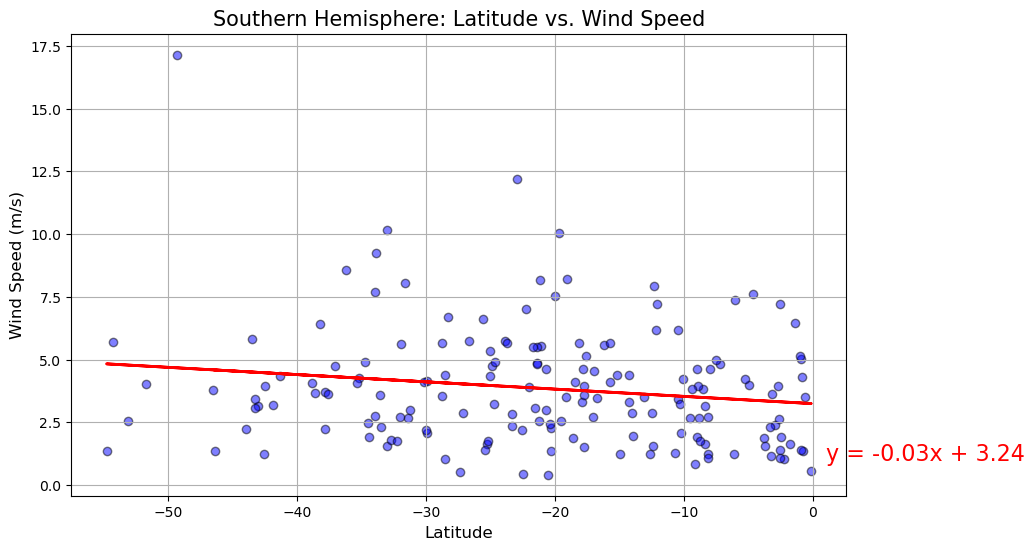

In [263]:
# Southern Hemisphere

#Create a DataFrame with southern Hemisphere data (Latitude < = 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0].copy()

# Check for and remove any NaN values
#northern_hemi_df = northern_hemi_df.dropna(subset=['Lat', 'Wind Speed'])

#Create a scatter plot for latitude vs. Wind Speed
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue', alpha=0.5, edgecolor='black')

# Step 5: Prepare the data for linear regression
x = southern_hemi_df['Lat']  # Independent variable (Latitude)
y = southern_hemi_df['Wind Speed']  # Dependent variable (Wind Speed)

# Step 6: Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Step 7: Calculate R^2
r_squared = r_value ** 2
# Print the results
print(f"The R^2 value is: {r_squared:.4f}")


# Step 8: Calculate predicted y values based on the regression line
y_pred = slope * x + intercept

equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2));
plt.text(1, 1, equation, color='red', size='16');

# Step 9: Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')


# Incorporate the other graph properties
plt.title('Southern Hemisphere: Latitude vs. Wind Speed', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_Southern_Hemisphere.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationship between latitude and wind speed in both the Northern and Southern Hemispheres can provide insights into how geographic and climatic factors influence wind patterns. Here’s a breakdown of key aspects of this relationship:

Nature of the Relationship:
Slope: The slope of the regression line indicates whether wind speed increases or decreases with latitude.
A positive slope suggests that as latitude increases (moving towards the poles), wind speed also increases. This could be due to factors like increased atmospheric circulation or fewer geographical obstructions.
A negative slope would indicate that wind speed decreases as latitude increases, possibly reflecting calmer conditions in higher latitudes or specific climatic phenomena.

R² Value:
The R² value quantifies how well latitude explains the variability in wind speed.
A high R² value (close to 1) suggests a strong correlation, meaning changes in latitude can significantly predict changes in wind speed.
A low R² value (close to 0) indicates that latitude explains little of the variability, suggesting other factors—such as local topography, seasonal variations, and weather patterns—might play a larger role.

Geographic Influences:
The relationship may be influenced by geographic features like mountains, bodies of water, and urbanization. For instance, coastal areas might experience different wind patterns compared to inland regions due to oceanic influences.

Climatic Patterns:
Understanding the linear relationship can help identify broader climatic zones. For example, certain latitudes may experience consistent wind patterns due to prevailing winds and atmospheric conditions.

Comparative Analysis:
Analyzing the linear relationships in both hemispheres can reveal significant contrasts. Differences in wind speed behavior with latitude can indicate how ocean currents, seasonal changes, and geographic features interact differently in the Northern and Southern Hemispheres.
Summary
The linear relationship between latitude and wind speed can provide important insights into climatic dynamics, helping to inform weather predictions and climate models. Comparing results from both hemispheres adds depth to the analysis, revealing unique patterns and influences based on geographic and climatic conditions. 